# A quick run-down of the data structures used in this analysis.

The `gzbuilder_analysis` package (available on [GitHub]https://github.com/tingard/gzbuilder_analysis(https://github.com/tingard/gzbuilder_analysis)) provides a set of tools to reduce, aggregate and fit the results of the Galaxy Builder project.

The spiral arm data used in this work is encoded in a pickled DataFrame of `gzbuilder_analysis.aggregation.spirals.oo.Pipeline` and `gzbuilder_analysis.aggregation.spirals.oo.Arm` objects, each of which contains information on the galaxy (position angle, ellipticity), poly-line arms drawn by volunteers, the ensuing clusters and logarithmic spiral fit.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from gzbuilder_analysis.aggregation.spirals.oo import Pipeline, Arm

We can load in the table with Pandas easily (note this may require specific versions of pandas and scikit-learn, which should be printed in any error messages).

Note that in the data loaded here the "main" and "validation" classifications have been merged. Non-merged data is available in `lib/spiral_arms.pickle`

In [2]:
merged_arms = pd.read_pickle('lib/merged_arms.pickle')

It's then easy to grab the `Arm` objects corresponding to a single galaxy:

In [3]:
merged_arms.loc[20902040].dropna()

pipeline    <gzbuilder_analysis.aggregation.spirals.oo.__p...
arm_0       <gzbuilder_analysis.aggregation.spirals.oo.__a...
arm_1       <gzbuilder_analysis.aggregation.spirals.oo.__a...
Name: 20902040, dtype: object

In [4]:
pipeline, arm0, arm1 = merged_arms.loc[20902040].dropna()

We can very easily access all of the arms drawn by volunteers:

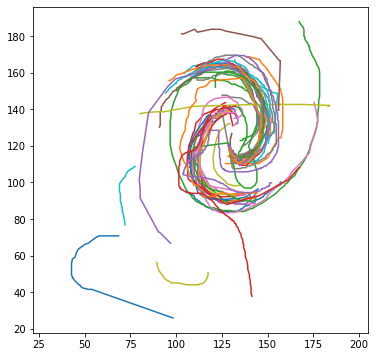

In [5]:
plt.figure(figsize=(6, 6))
for arm in pipeline.drawn_arms:
    plt.plot(*arm.T)
plt.axis('equal');

We can also assess the clustering of points, and identification of outliers:

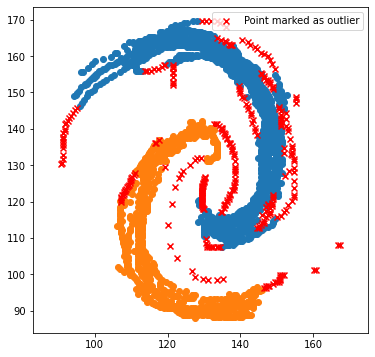

In [6]:
plt.figure(figsize=(6, 6))
for arm in (arm0, arm1):
    plt.scatter(*arm.coords[arm.outlier_mask].T)
    plt.scatter(*arm.coords[~arm.outlier_mask].T, c='r', marker='x')
plt.scatter([], [], c='r', marker='x', label='Point marked as outlier')
plt.legend()
plt.axis('equal');

Finally, we can observe the logarithmic spirals fit independently to each arm (**not** the output from the Bayesian model used in this work)

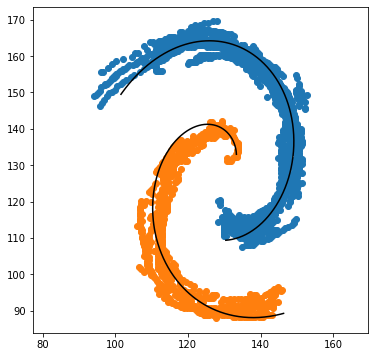

In [7]:
plt.figure(figsize=(6, 6))
for arm in (arm0, arm1):
    plt.scatter(*arm.coords[arm.outlier_mask].T)
    plt.plot(*arm.reprojected_log_spiral.T, c='k')
plt.axis('equal');

For more details on how these `Arm` objects are passed to the `hierarchical_model.UniformHBSM` classes used in `performing_inference.ipynb` and `do_inference.py`, please refer to `generate_sample.py`.